In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf


In [2]:
data = pd.read_csv("BTC_USD_2013-10-01_2021-07-18-CoinDesk.csv")

data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2842,BTC,2021-07-14,32544.844908,33088.125767,33334.103032,32206.600517
2843,BTC,2021-07-15,33003.812922,32724.856210,33104.154400,31620.150444
2844,BTC,2021-07-16,31783.171349,32830.920126,33182.027657,31189.554242
2845,BTC,2021-07-17,31596.294383,31875.319938,32243.681207,31093.247433


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2847 non-null   object 
 1   Date                 2847 non-null   object 
 2   Closing Price (USD)  2847 non-null   float64
 3   24h Open (USD)       2847 non-null   float64
 4   24h High (USD)       2847 non-null   float64
 5   24h Low (USD)        2847 non-null   float64
dtypes: float64(4), object(2)
memory usage: 133.6+ KB


In [4]:
import datetime

data['Date'] = pd.to_datetime(data.Date)

In [5]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month

In [6]:
data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),year,month
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349,2013,10
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383,2013,10
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833,2013,10
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816,2013,10
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566,2013,10


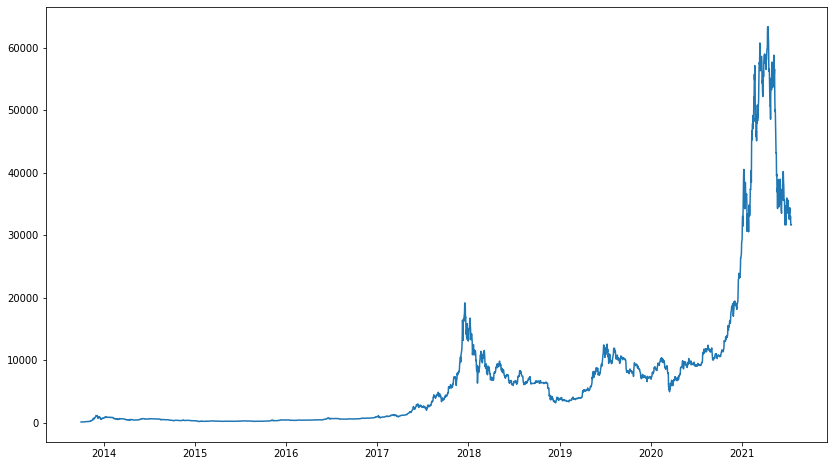

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(data.iloc[:,1], data.iloc[:,2])

<AxesSubplot:title={'center':'monthly average bitcoin distribution'}, xlabel='year'>

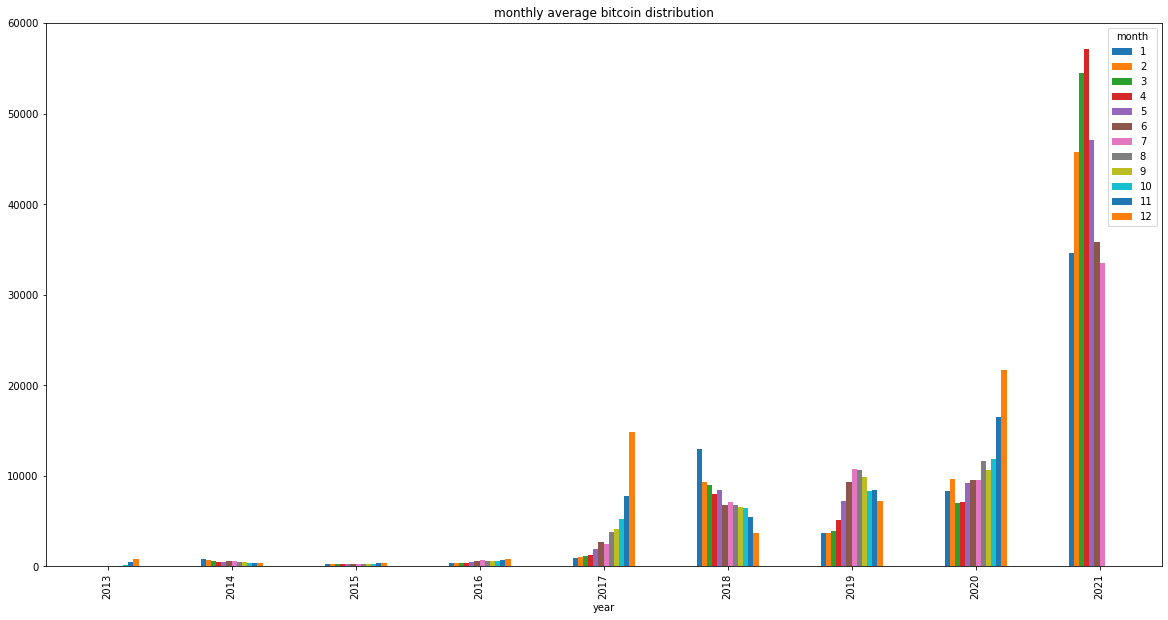

In [8]:
monthly_bc = data.groupby(['year','month'])['Closing Price (USD)'].mean().sort_values(ascending = False)
monthly_bc.unstack().plot(kind='bar', title= 'monthly average bitcoin distribution' , width = 0.5, figsize=(20, 10))

<AxesSubplot:title={'center':'yearly min bitcoin distribution'}, xlabel='year'>

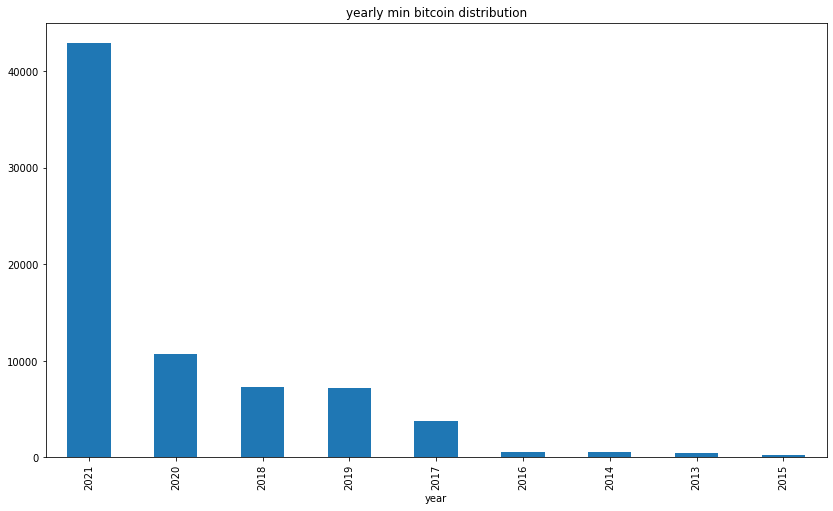

In [9]:
yearly_bc_min = data.groupby(['year'])['24h Low (USD)'].mean().sort_values(ascending = False)
yearly_bc_min.plot(kind='bar', title= 'yearly min bitcoin distribution', figsize=(14, 8))

<AxesSubplot:title={'center':'yearly max bitcoin distribution'}, xlabel='year'>

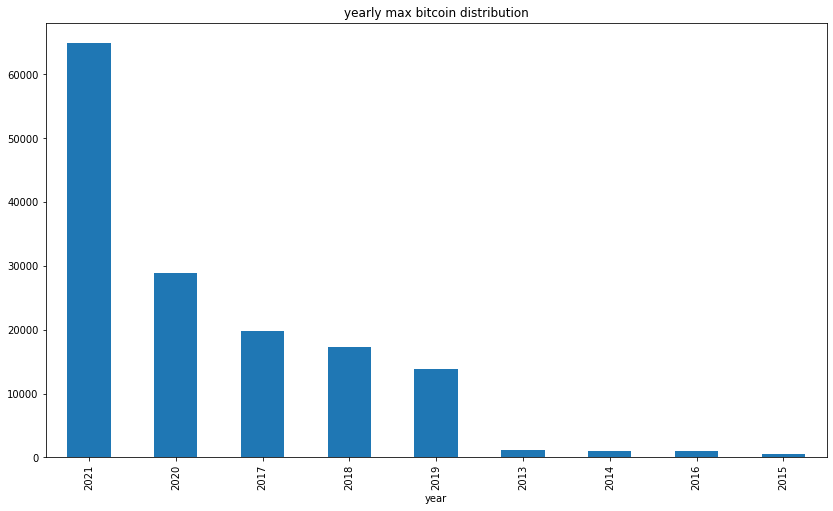

In [10]:
yearly_bc_max = data.groupby(['year'])['24h High (USD)'].max().sort_values(ascending = False)
yearly_bc_max.plot(kind='bar', title= 'yearly max bitcoin distribution' , figsize=(14, 8))

In [11]:
yearly_sub = data.loc[(data['year'] >= 2017) & (data['year'] <= 2019)]

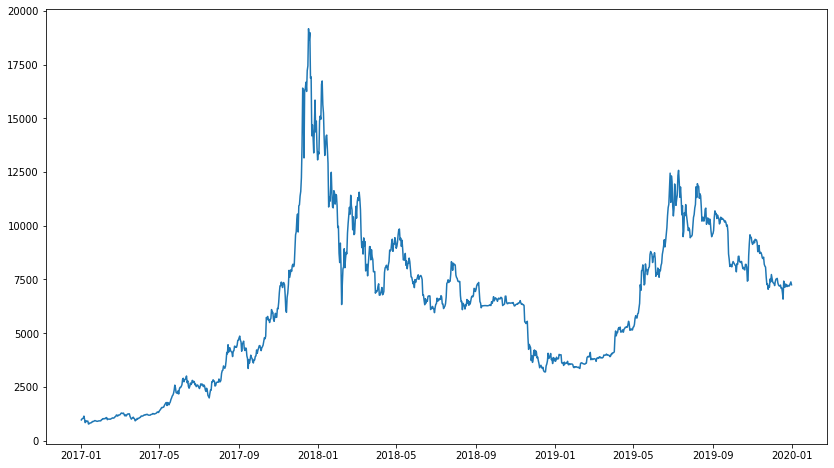

In [12]:
plt.figure(figsize=(14, 8))
plt.plot(yearly_sub.iloc[:,1], yearly_sub.iloc[:,2])

<AxesSubplot:title={'center':'monthly average bitcoin distribution (2017 to 2019)'}, xlabel='year'>

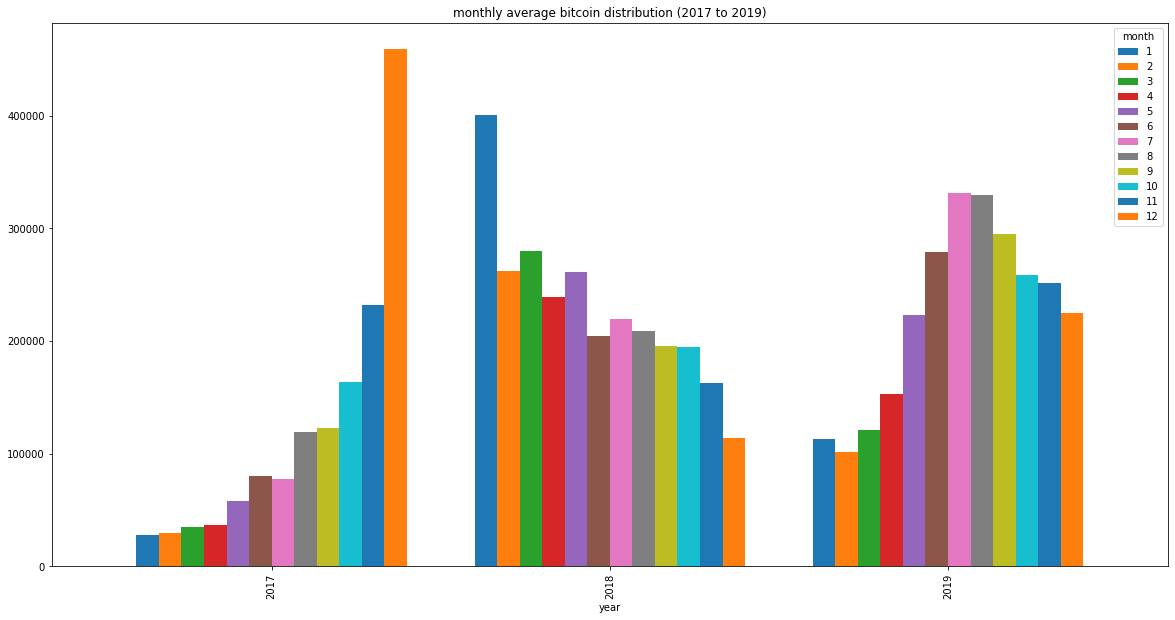

In [13]:
yearly_sub_1 = yearly_sub.groupby(['year','month'])['Closing Price (USD)'].sum().sort_values(ascending = False)
yearly_sub_1.unstack().plot(kind='bar', title= 'monthly average bitcoin distribution (2017 to 2019)' , width = 0.8, figsize=(20, 10))

In [14]:
yearly_sub_frame = data.loc[(data['year'] >= 2019) & (data['year'] <= 2020)]

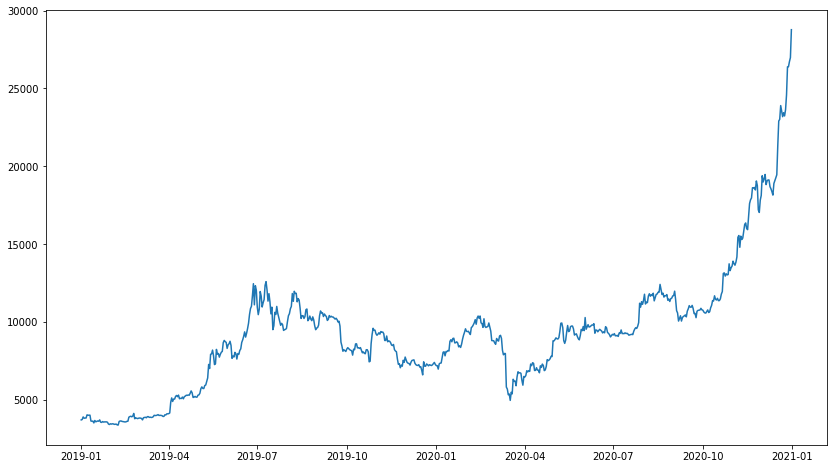

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(yearly_sub_frame.iloc[:,1], yearly_sub_frame.iloc[:,2])

<AxesSubplot:title={'center':'monthly average bitcoin distribution (2017 to 2019)'}, xlabel='year'>

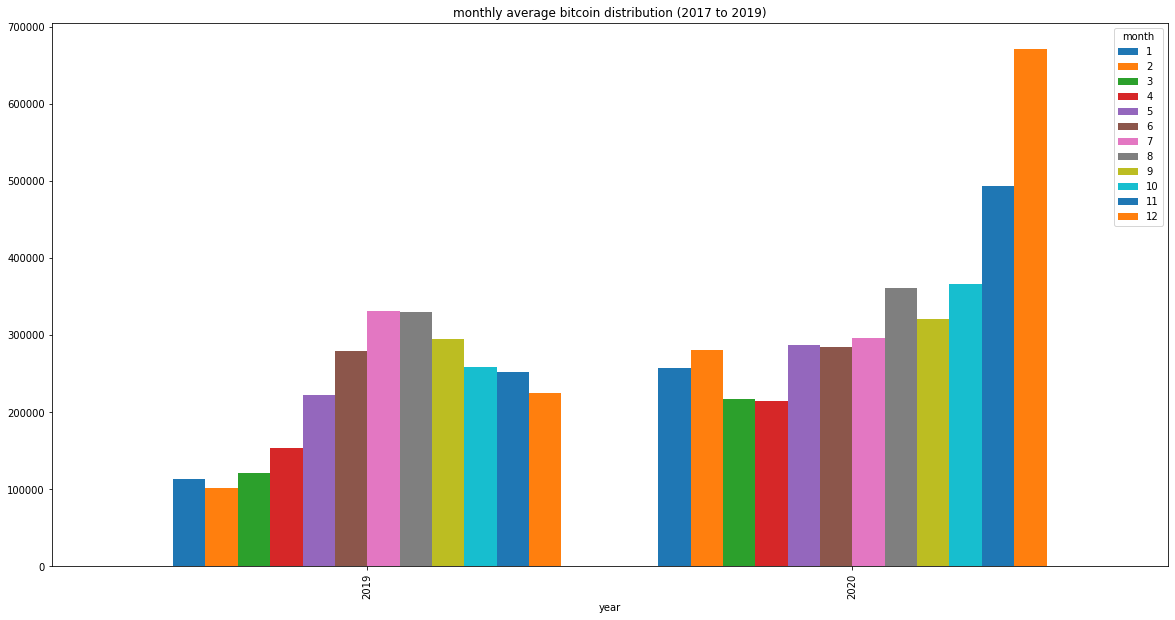

In [16]:
yearly_sub_2 = yearly_sub_frame.groupby(['year','month'])['Closing Price (USD)'].sum().sort_values(ascending = False)
yearly_sub_2.unstack().plot(kind='bar', title= 'monthly average bitcoin distribution (2017 to 2019)' , width = 0.8, figsize=(20, 10))

In [17]:
data['year'] = [d.year for d in data.Date]
data['month'] = [d.strftime('%b') for d in data.Date]

years = data['year'].unique()

# Time-series Forecasting

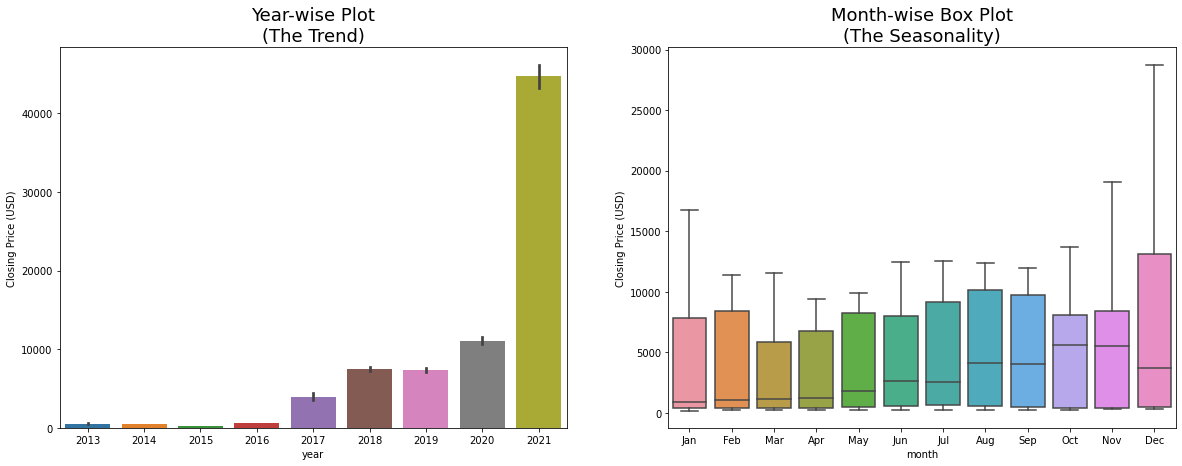

In [18]:
import seaborn as sns

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.barplot(x='year', y='Closing Price (USD)', data=data, ax=axes[0])
sns.boxplot(x='month', y='Closing Price (USD)', data=data.loc[~data.year.isin([2013, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [19]:
dataset= data[['Date', 'Closing Price (USD)']].set_index('Date')

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(dataset['Closing Price (USD)'], model='multiplicative', extrapolate_trend='freq' , period = 52)

In [21]:
result_add = seasonal_decompose(dataset['Closing Price (USD)'], model='additive', extrapolate_trend='freq', period = 52)

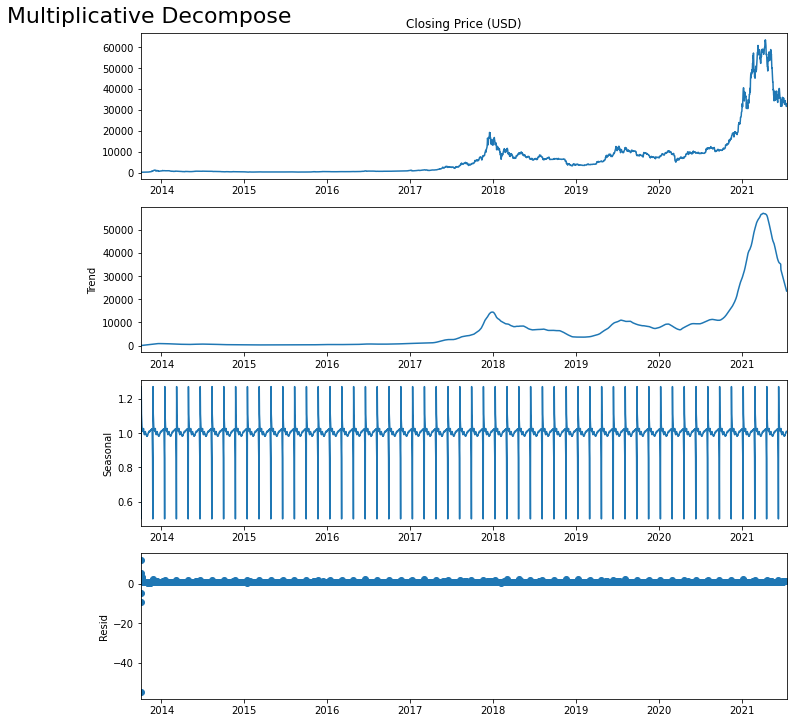

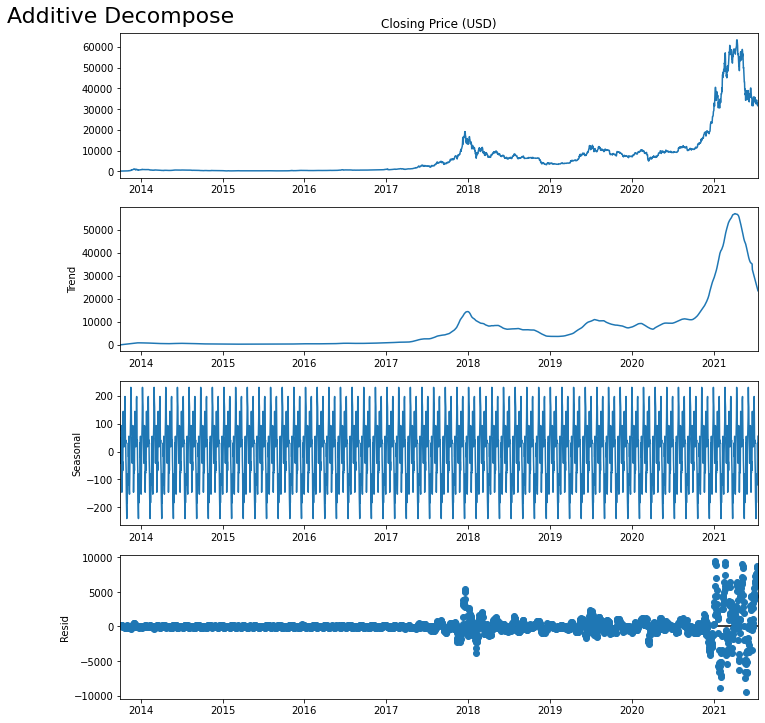

In [22]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22, x=0.1, y=1)
result_add.plot().suptitle('Additive Decompose', fontsize=22, x=0.1, y=1)
plt.show()

In [23]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2013-10-01,0.918974,-27.360284,-4.917990,123.65499
2013-10-02,0.852338,-15.660532,-9.398741,125.45500
2013-10-03,0.499765,-3.960781,-54.855785,108.58483
2013-10-04,1.270063,7.738970,12.073952,118.67466
2013-10-05,1.109897,19.438721,5.624047,121.33866


In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(dataset['Closing Price (USD)'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.160855774226645
p-value: 0.6902039613305302
Critial Values:
   1%, -3.4326726638430176
Critial Values:
   5%, -2.862566191457111
Critial Values:
   10%, -2.5673162728198173


In [25]:
result = kpss(dataset['Closing Price (USD)'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 4.665943
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\palas\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


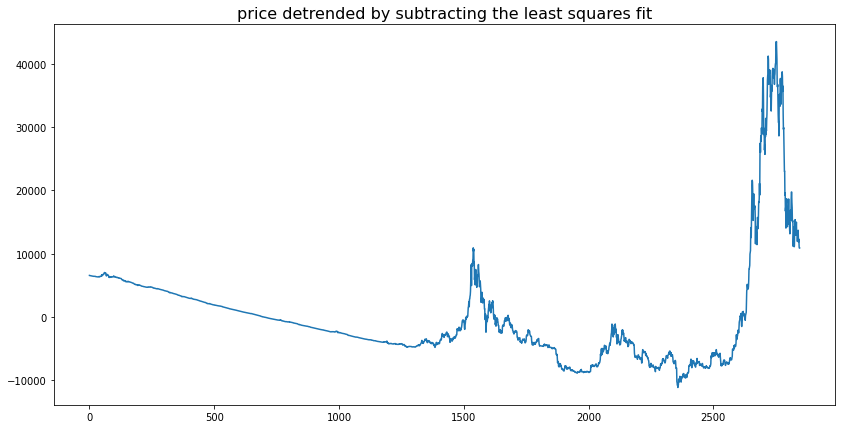

In [26]:
from scipy import signal

detrended = signal.detrend(dataset['Closing Price (USD)'])
plt.figure(figsize = (14,7))
plt.plot(detrended)
plt.title('price detrended by subtracting the least squares fit', fontsize=16);

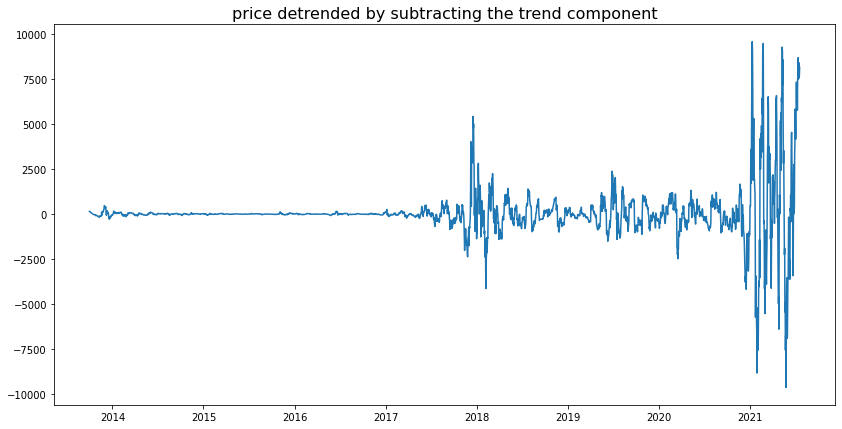

In [27]:
result_mul = seasonal_decompose(dataset['Closing Price (USD)'], model='multiplicative', extrapolate_trend='freq', period = 52)
detrended = dataset['Closing Price (USD)'] - result_mul.trend

plt.figure(figsize = (14,7))
plt.plot(detrended)
plt.title('price detrended by subtracting the trend component', fontsize=16);

[]

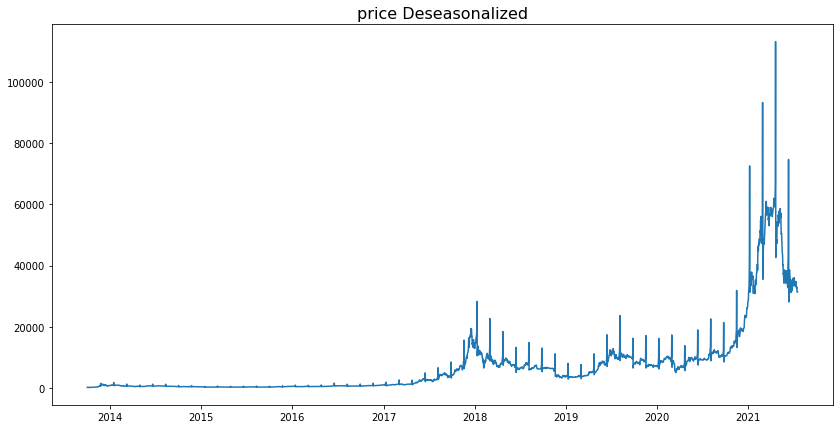

In [28]:
# Time Series Decomposition
result_mul = seasonal_decompose(dataset['Closing Price (USD)'], model='multiplicative', extrapolate_trend='freq', period = 52)

# Deseasonalize
deseasonalized = dataset['Closing Price (USD)'] / result_mul.seasonal

# Plot
plt.figure(figsize = (14,7))
plt.plot(deseasonalized)


plt.title('price Deseasonalized', fontsize=16)
plt.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

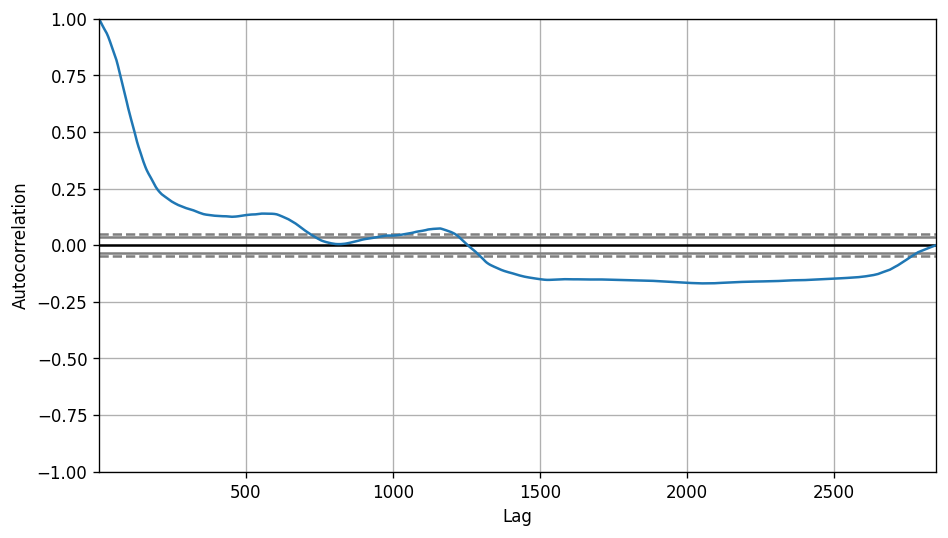

In [29]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(dataset['Closing Price (USD)'].tolist())

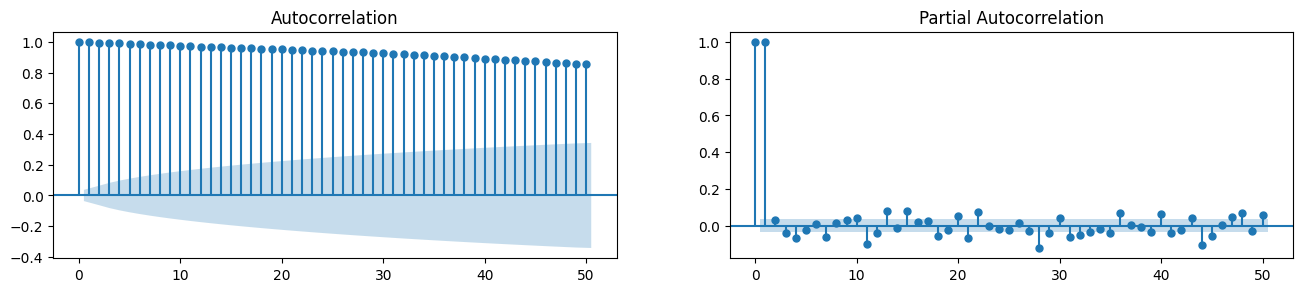

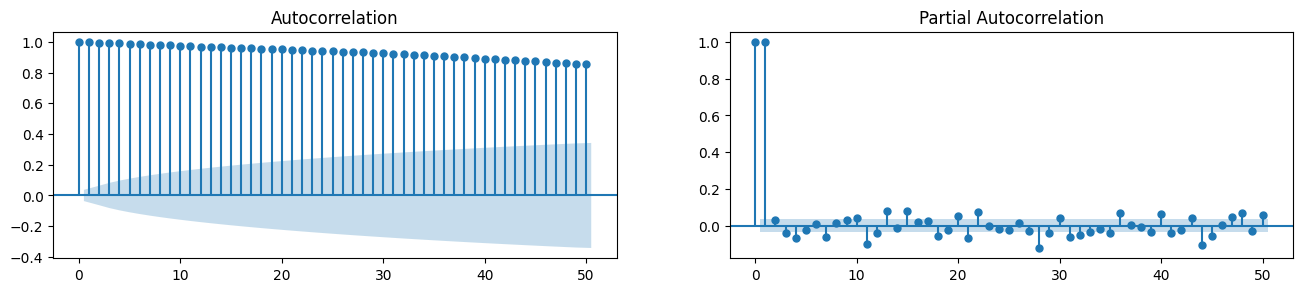

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset['Closing Price (USD)'].tolist(), lags=50, ax=axes[0])
plot_pacf(dataset['Closing Price (USD)'].tolist(), lags=50, ax=axes[1])


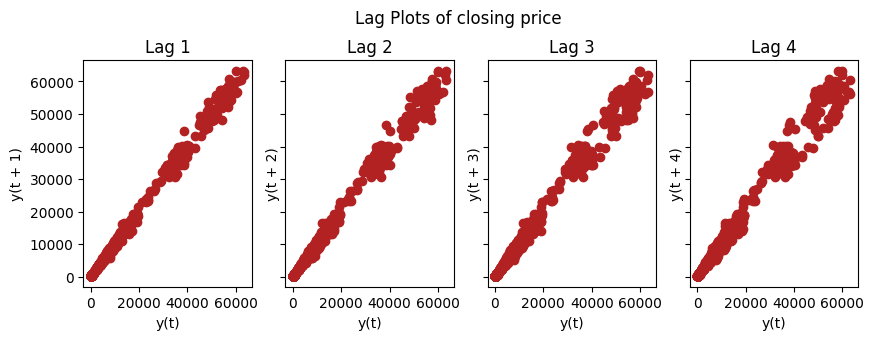

In [31]:
from pandas.plotting import lag_plot


fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(dataset['Closing Price (USD)'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of closing price', y=1.05)    
plt.show()

In [32]:


def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(dataset['Closing Price (USD)'], m=2, r=0.2*np.std(dataset['Closing Price (USD)'])))   
   



0.07131389268968302


In [33]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(dataset['Closing Price (USD)'], m=2, r=0.2*np.std(dataset['Closing Price (USD)'])))      
    

0.016528564466212498


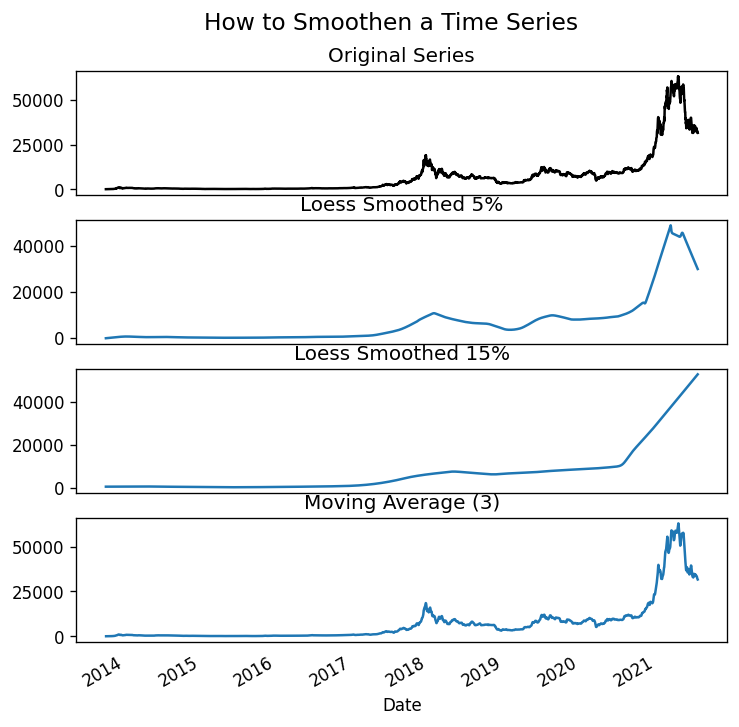

In [34]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = dataset['Closing Price (USD)'].rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(dataset['Closing Price (USD)'], np.arange(len(dataset['Closing Price (USD)'])), frac=0.05)[:, 1], index=dataset.index, columns=['Closing Price (USD)'])
df_loess_15 = pd.DataFrame(lowess(dataset['Closing Price (USD)'], np.arange(len(dataset['Closing Price (USD)'])), frac=0.15)[:, 1], index=dataset.index, columns=['Closing Price (USD)'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
dataset['Closing Price (USD)'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['Closing Price (USD)'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['Closing Price (USD)'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()


In [35]:
from statsmodels.tsa.stattools import grangercausalitytests
dataset1 = dataset.reset_index()

dataset1['month'] = dataset1.Date.dt.month
grangercausalitytests(dataset1[['Closing Price (USD)', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0414  , p=0.8389  , df_denom=2843, df_num=1
ssr based chi2 test:   chi2=0.0414  , p=0.8388  , df=1
likelihood ratio test: chi2=0.0414  , p=0.8388  , df=1
parameter F test:         F=0.0414  , p=0.8389  , df_denom=2843, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0465  , p=0.9546  , df_denom=2840, df_num=2
ssr based chi2 test:   chi2=0.0932  , p=0.9545  , df=2
likelihood ratio test: chi2=0.0932  , p=0.9545  , df=2
parameter F test:         F=0.0465  , p=0.9546  , df_denom=2840, df_num=2


{1: ({'ssr_ftest': (0.04135186592928733, 0.8388747938803257, 2843.0, 1),
   'ssr_chi2test': (0.04139550138401398, 0.8387764102513641, 1),
   'lrtest': (0.0413952003364102, 0.8387769884546699, 1),
   'params_ftest': (0.04135186592840554, 0.8388747938821453, 2843.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.04649404011087424, 0.9545709762514107, 2840.0, 2),
   'ssr_chi2test': (0.09315179163058959, 0.9544921158635542, 2),
   'lrtest': (0.09315026666445192, 0.9544928436479093, 2),
   'params_ftest': (0.046494040110154136, 0.9545709762521633, 2840.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}